In [1]:
## Based on
#  - https://realpython.com/linear-regression-in-python/
#  - https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [2]:
import pandas as pd

In [3]:
# Local data cache
datadir = '../common-data/covid/'
datafile = datadir + "data.csv"

In [4]:
# Read data from local file
data = pd.read_csv(datafile, parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
# Finding the number of cases in a state and county
condition = (data['state'] =='South Carolina') & (data['county'] =='Richland')
data_sc_r = data[condition]

In [6]:
# See a sample
data_sc_r.head()

,date,county,state,fips,cases,deaths
3649,2020-03-17,Richland,South Carolina,45079.0,1,0
4269,2020-03-18,Richland,South Carolina,45079.0,4,0
5013,2020-03-19,Richland,South Carolina,45079.0,8,0
5893,2020-03-20,Richland,South Carolina,45079.0,22,0
6903,2020-03-21,Richland,South Carolina,45079.0,28,0


In [7]:
# Get its statistics
data_sc_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 3649 to 398064
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    140 non-null    datetime64[ns]
 1   county  140 non-null    object        
 2   state   140 non-null    object        
 3   fips    140 non-null    float64       
 4   cases   140 non-null    int64         
 5   deaths  140 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 7.7+ KB


In [8]:
# Seeing visually if there is a relationship between cases and deaths
import matplotlib.pyplot as plt
%matplotlib inline

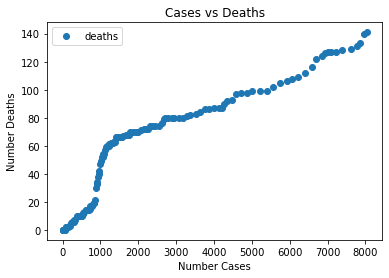

In [9]:
data_sc_r.plot(x='cases', y='deaths', style='o')
plt.title('Cases vs Deaths')
plt.xlabel('Number Cases')
plt.ylabel('Number Deaths')
plt.show()

In [10]:
# Imports for classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [11]:
# Get the data of interest
x = data_sc_r ['cases']
y = data_sc_r ['deaths']

In [12]:
# Type and shape changes
x, y = np.array(x), np.array(y)

In [13]:
x = x.reshape(-1,1)

In [14]:
# Get a subset for taining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
print (x_train.size, x_test.size, y_train.size, y_test.size)

112 28 112 28


In [16]:
# Train a linear regression mode
model = LinearRegression().fit(x_train, y_train)

In [17]:
# Model information
print (' Model details:')
print (' -  intercept : ', model.intercept_)
print (' -  coeff : ', model.coef_)

 Model details:
 -  intercept :  20.70150073495529
 -  coeff :  [0.01613032]


In [18]:
# Predicted values for train and test
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [19]:
# Define a function to predict error statistics
def print_stats(y_actual, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

In [20]:
# Print for training data
print_stats(y_train, y_pred_train)

Mean Absolute Error: 14.484230845656787
Mean Squared Error: 250.94093491049287
Root Mean Squared Error: 15.841115330382923


In [21]:
# Print for test data
print_stats(y_test, y_pred_test)

Mean Absolute Error: 14.424057031054755
Mean Squared Error: 249.71969394454706
Root Mean Squared Error: 15.8025217590278
